# A simple Perceptron in NumPy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs #for data generatio

In [2]:
#create data
X, y = make_blobs(n_samples=100, centers=2, n_features=2,center_box=(-1,10),random_state=42)

In [3]:
y=(y*2-1) #scale true lables from [0,1] to [-1,1
print(y)

[-1  1 -1  1  1 -1  1  1 -1 -1 -1  1 -1 -1  1  1  1  1  1 -1  1  1  1  1
  1 -1  1 -1  1  1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1
 -1  1  1 -1 -1  1 -1  1 -1  1  1 -1 -1  1 -1  1  1  1  1 -1  1  1 -1  1
  1  1  1  1  1 -1  1 -1  1 -1 -1 -1  1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1
 -1  1 -1 -1]


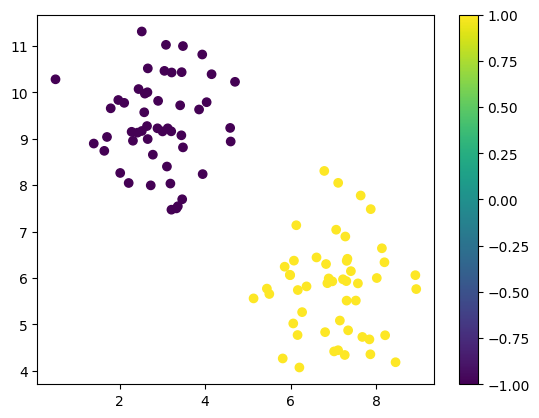

In [4]:
#plot data
plt.scatter(X[:,0],X[:,1],c=y)
plt.colorbar()

## Parameterize the classifier hyper-plane
* find offset $b$ and normal vector $w$

In [5]:
def plot_line_from_normal_vector_and_offset(normal_vector, offset, x_range=None, ax=None, **kwargs):
    """
    Plots a 2D line defined by its normal vector w and offset b such that wx + b = 0.

    Args:
        normal_vector (list or numpy.ndarray): A 2D vector representing the normal to the line (w). Must be of length 2.
        offset (float): The offset (b) such that w.x + b = 0.
        x_range (tuple, optional): A tuple (xmin, xmax) specifying the range of x-values to plot.
                                     If None (default), a reasonable range is automatically determined.
        ax (matplotlib.axes._axes.Axes, optional): The matplotlib axes object to plot on. If None (default),
                                                  the current axes (plt.gca()) is used, or a new figure and axes
                                                  are created.
        **kwargs: Keyword arguments to pass to the `plot` function (e.g., color, linestyle, linewidth).

    Returns:
        matplotlib.lines.Line2D: The line object created by `ax.plot`.
    """
    normal_vector = np.array(normal_vector)  # Ensure it's a NumPy array for calculations

    if normal_vector.shape != (2,):
        raise ValueError("Normal vector must be a 2D vector (length 2).")

    w1, w2 = normal_vector

    if ax is None:
        fig, ax = plt.subplots()

    if x_range is None:
        # Determine a reasonable x-range
        xmin = -5
        xmax = 5
        x_range = (xmin, xmax)

    xmin, xmax = x_range
    x = np.linspace(xmin, xmax, 100)  # Generate x-values

    if w2 != 0:
        y = (-w1 * x - offset) / w2  # Solve for y: w1*x + w2*y + b = 0  =>  y = (-w1*x - b) / w2
    else:
        # Handle the case where the line is vertical (w2=0). Plot a vertical line.
        if w1 == 0:
            raise ValueError("Cannot plot line with w1=0 and w2=0.")
        x = np.full_like(x, -offset / w1)  # x is constant for a vertical line
        y = np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 100)  # generate y values spanning the current y-axis.



    line, = ax.plot(x, y, **kwargs)

    return line

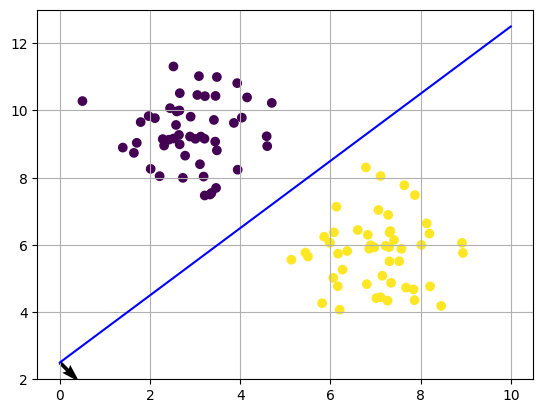

In [6]:
#part 1: find slope and intercept by using the visualization
w=np.array([1,-1])
b=2.5

#line1 = plot_line_from_normal_vector(w, b, color='blue',x_range=[0,10])
line1 = plot_line_from_normal_vector_and_offset(w, b, color='blue',x_range=[0,10])
plt.scatter(X[:,0],X[:,1],c=y)
plt.quiver(0,b,w[0],w[1])
plt.grid()

### Classify samples via $sgn(wx+b)$

### classify single sample

In [7]:
#use first train sample
w.dot(X[1,:].T)+b

np.float64(3.995939224898428)

In [8]:
#or
X[1,:].dot(w)+b

np.float64(3.995939224898428)

In [9]:
# check for all train samples if sign(y)==sign(wx+b)
i=1
print (y[i],np.sign(w.dot(X[i,:].T)+b))
y[i]==np.sign(w.dot(X[i,:].T)+b)

1 1.0


np.True_

### classify all samples at once
* change vector dot-product to vector matrix mult (matrix holds all samples)

In [10]:
w.dot(X.T)+b

array([-4.13143132,  3.99593922, -4.49322138,  2.89195721,  2.88700721,
       -5.01455702,  3.41619758,  2.34746363, -2.76650927, -4.36792121,
       -2.34563967,  4.05019594, -4.84995049, -5.36296335,  3.05441162,
        3.50549826,  1.56367813,  2.41332512,  5.16786905, -1.75858637,
        5.42652256,  3.47278173,  5.66710944,  4.51728524,  3.44474996,
       -3.02613798,  3.54843635, -4.38163027,  4.19164693,  0.98186403,
       -3.83793248, -4.59659385, -5.36460766, -2.14649099, -1.73125762,
        2.3630915 ,  3.75455358, -4.48219776, -4.14465262, -1.66938234,
       -3.27081776,  6.01107157,  2.20492376,  4.51275657,  4.47503808,
       -1.8417518 , -5.43838576, -3.80285106, -3.74804441,  2.11883293,
        2.52615785, -5.00054637, -3.835604  ,  3.76369287, -1.68267355,
        5.44951494, -4.7094835 ,  4.29868634,  3.89298589, -2.83116028,
       -3.45186164,  3.02922675, -4.8809437 ,  2.07443269,  5.94596793,
        2.92910749,  5.67829812, -4.83264148,  2.17457294,  3.87

In [11]:
np.sign(w.dot(X.T)+b)

array([-1.,  1., -1.,  1.,  1., -1.,  1.,  1., -1., -1., -1.,  1., -1.,
       -1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1.,
        1., -1.,  1.,  1., -1., -1., -1., -1., -1.,  1.,  1., -1., -1.,
       -1., -1.,  1.,  1.,  1.,  1., -1., -1., -1., -1.,  1.,  1., -1.,
       -1.,  1., -1.,  1., -1.,  1.,  1., -1., -1.,  1., -1.,  1.,  1.,
        1.,  1., -1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,
        1., -1.,  1., -1., -1., -1.,  1., -1., -1., -1.,  1., -1.,  1.,
       -1., -1., -1., -1., -1., -1.,  1., -1., -1.])

In [12]:
#check result
y==np.sign(w.dot(X.T)+b)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [13]:
y==np.sign(X.dot(w.T)+b)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [14]:
# get IDs of wrong classified
pos=np.where(y!=np.sign(w.dot(X.T)+b))
print(pos)

(array([], dtype=int64),)


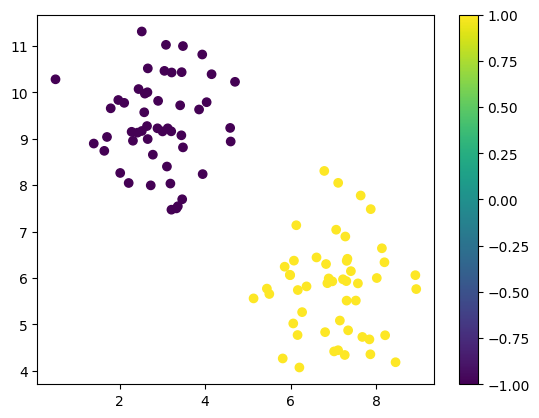

In [15]:
y_test=np.copy(y)
y_test[pos]=0
plt.scatter(X[:,0],X[:,1],c=y_test)#set color
plt.colorbar()
#abline(1,2)